Nama : Hafid Ahmad Adyatma || 1301194235

Disini saya menggunakan Support Vector Machine(SVM)

# Import Package

In [ ]:
# Setup setting terkait dengan plotting
import numpy as np                 # import numpy (mathematical operation)
import matplotlib.pyplot as plt      # import package untuk plotting
import pandas as pd           
from matplotlib import rcParams    # runtime configuration (rc)
rcParams['figure.figsize']    = (14,7)   # untuk membuat visualisasi lebih baik, modif parameter dibawah ini
rcParams['axes.spines.top']   = False
rcParams['axes.spines.right'] = False

# Exploratory Data Analysis(EDA)

In [ ]:
!gdown --id 1jAGHMNSBxmS5CfZjfyRVhEbFDdEbTEor

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1jAGHMNSBxmS5CfZjfyRVhEbFDdEbTEor
To: /content/DataClassification.csv
100% 826/826 [00:00<00:00, 1.11MB/s]


In [ ]:
df = pd.read_csv('DataClassification.csv')
df.head(10)

,x,Y,LABEL
0,1.0000,399.6550,1
1,5.8293,428.5600,1
2,10.6585,266.0618,1
3,15.4878,376.9293,1
4,20.3171,383.6759,1
5,25.1463,463.8939,1
6,29.9756,502.8094,1
7,34.8049,536.4060,1
8,39.6341,412.8075,1
9,44.4634,553.9108,1


In [ ]:
df.shape

(42, 3)

In [ ]:
df.dtypes

x        float64
Y        float64
LABEL      int64
dtype: object

In [ ]:
df.describe()

,x,Y,LABEL
count,42.000000,42.000000,42.000000
mean,50.500000,270.142800,1.500000
std,29.622361,290.457906,0.506061
min,1.000000,-238.180700,1.000000
25%,25.749975,39.681450,1.000000
50%,50.500000,238.058550,1.500000
75%,75.250025,528.006850,2.000000
max,100.000000,755.380100,2.000000


In [ ]:
df.isnull().sum() #checking for total null values

x        0
Y        0
LABEL    0
dtype: int64

Untuk melihat lebih jelas apakah terdapat outlier pada variabel di atas, disini saya akan membuat boxplot untuk memvisualisasi outliers dalam variabel di atas

Text(0, 0.5, 'Y')

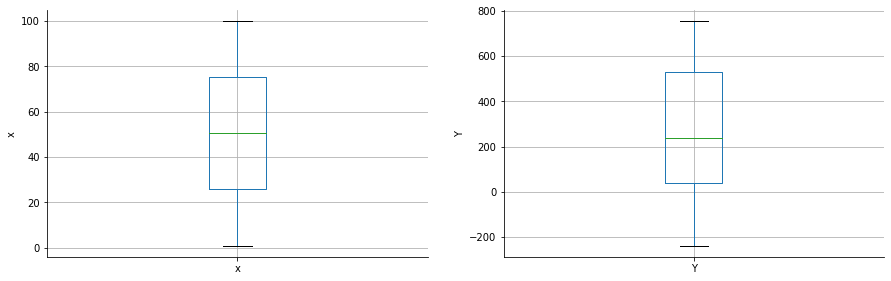

In [ ]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='x')
fig.set_title('')
fig.set_ylabel('x')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Y')
fig.set_title('')
fig.set_ylabel('Y')

Terlihat jelas pada boxplot di atas bahwa tidak ada outliers dalam variabel-variabel tersebut

In [ ]:
X = df.iloc[:, [0,1]]
Y = df.iloc[:, 2]

In [ ]:
X.head()

,x,Y
0,1.0000,399.6550
1,5.8293,428.5600
2,10.6585,266.0618
3,15.4878,376.9293
4,20.3171,383.6759


In [ ]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: LABEL, dtype: int64

Setelah melihat outliers disini saya akan membuat histogram untuk melihat distribusi untuk mengetahui apakah normal atau miring

Text(0, 0.5, 'Number of Y')

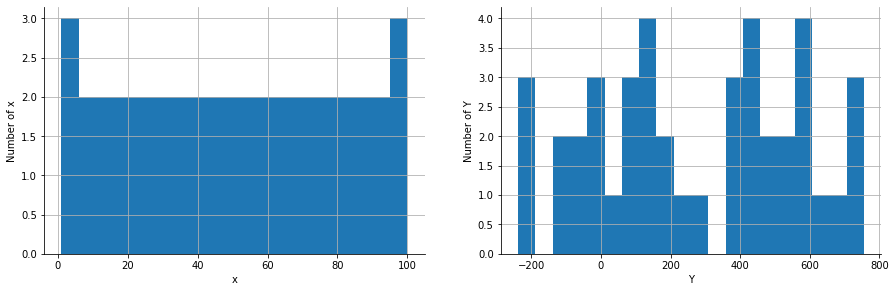

In [ ]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df['x'].hist(bins=20)
fig.set_xlabel('x')
fig.set_ylabel('Number of x')


plt.subplot(2, 2, 2)
fig = df['Y'].hist(bins=20)
fig.set_xlabel('Y')
fig.set_ylabel('Number of Y')

bisa dilihat pada histogram di atas bahwa untuk kedua variabel tersebut normal

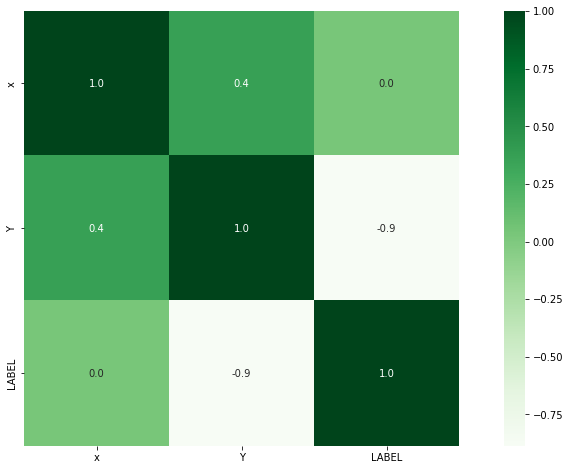

In [ ]:
import seaborn as sns
corr = df.corr()

plt.figure(figsize=(16,8))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens',)

# Split Data

In [ ]:
from sklearn.model_selection import train_test_split #split dataset
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [ ]:
X_train.shape

(33, 2)

In [ ]:
X_test.shape

(9, 2)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler #Feature Scaling

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)

X_test = sc_X.transform(X_test)

# SVM with kernel

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train,Y_train)

Y_Pred = classifier.predict(X_test)


In [ ]:
Y_Pred

array([2, 2, 2, 1, 1, 2, 2, 1, 2])

In [ ]:
from sklearn import metrics
print('Accuracy Score : with linear kernel')
print(metrics.accuracy_score(Y_test,Y_Pred))

Accuracy Score : with linear kernel
1.0


In [ ]:
df0 = df[df.LABEL==1]
df1 = df[df.LABEL==2]

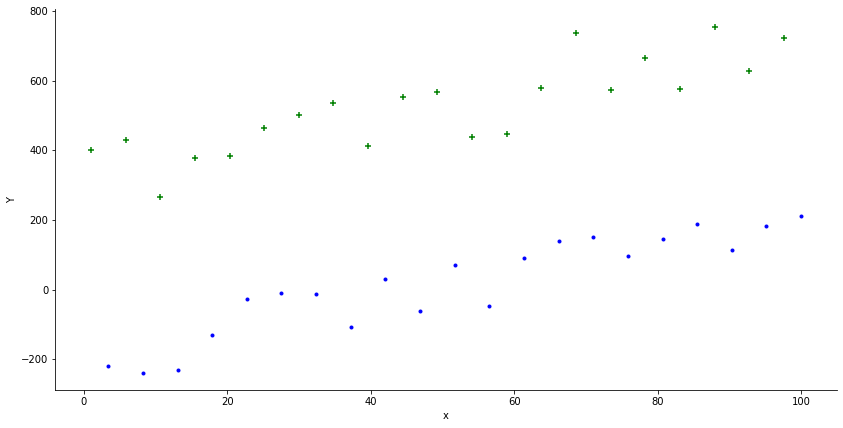

In [ ]:
plt.xlabel('x')
plt.ylabel('Y')

plt.scatter(df0['x'],df0['Y'],color='green',marker='+')
plt.scatter(df1['x'],df1['Y'],color='blue',marker='.')

<function matplotlib.pyplot.show(*args, **kw)>

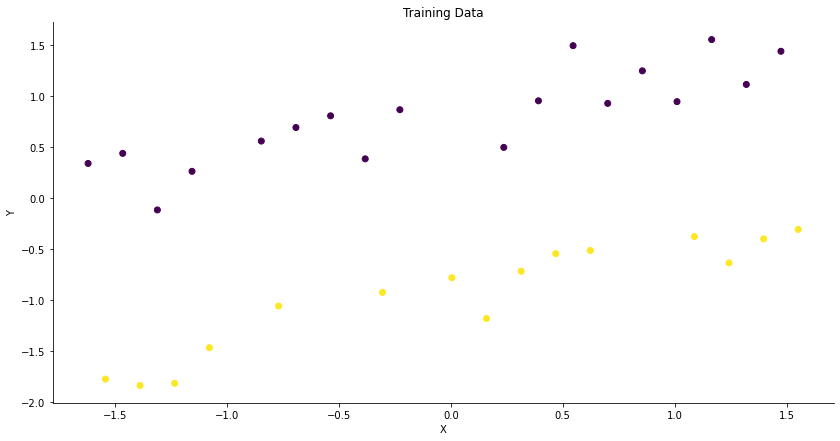

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, 1],c=Y_train)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training Data')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

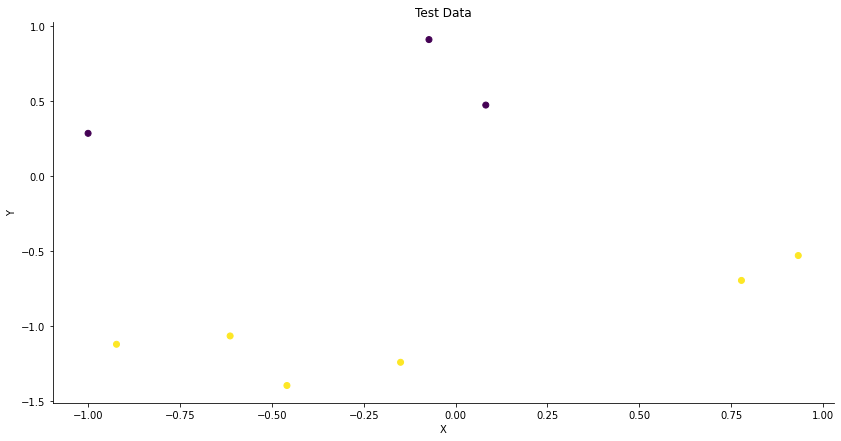

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], X_test[:, 1],c=Y_test)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Test Data')
plt.show

# SVM with hyperplane

VALIDATION

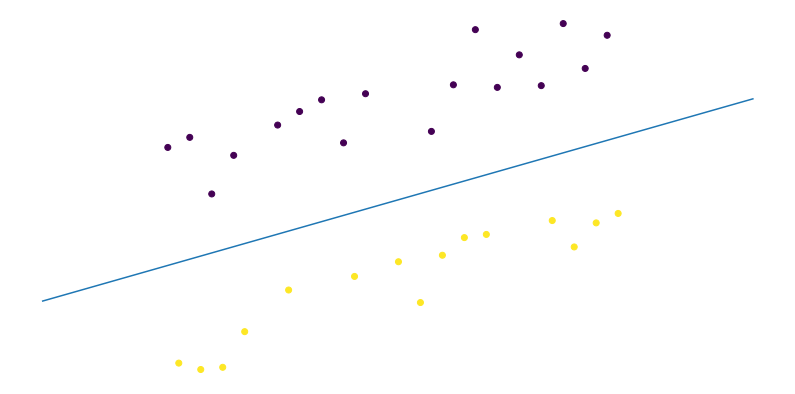

In [ ]:
#QUALITATIVE -> Visualization using hyperplane


from sklearn.svm import SVC

classifier = SVC(kernel='linear',random_state=0)
classifier.fit(X_train,Y_train)

Y_Pred = classifier.predict(X_test)

plt.scatter(X_train[:,0], X_train[:,1],c=Y_train)

#hyperplane
w = classifier.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (classifier.intercept_[0] / w[1])

plt.plot(xx, yy)
plt.axis("off"),plt.show();

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,Y_train)


# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score with default hyperparameters: 1.0000


In [ ]:
#QUANTITATIVE validate the predicted value with testing data using RMSE

print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

RMSE: 0.0
